Лабораторна робота №4
студента МІТ-31
Квартюк Олексій Борисович

Завдання:
1)
a. Створення тензорів:

Створити тензори різних розмірів та форм (скаляр, вектор, матриця) зі значеннями за замовчуванням або випадковими значеннями.
Використати константи, змінні, або інші функції для створення тензорів.

b. Операції з тензорами:

Виконати операції додавання, віднімання, множення, та ділення між тензорами.
Застосувати математичні функції (наприклад, синус, косинус) до тензорів.

c. Індексація та зрізи:

Звернутися до окремих елементів в тензорах та зрізати їх для отримання підмножини даних.

d. Зміна форми тензорів:

Змінити розмір та форму тензорів (решейп) для підготовки їх до подальших операцій.

2) Глибше ознайомлення з TensorFlow:

a. Регресія:

Згенерувати синтетичний набір даних для задачі регресії, включаючи ознаки та відповідні значення цільової змінної.
Створити послідовну модель нейронної мережі з Dense шарами для регресії.
Вибрати функцію втрати та оптимізатор для навчання моделі регресії.
Навчити модель та оцінити її регресійну точність.

b. Класифікація:

Згенерувати синтетичний набір даних для задачі бінарної класифікації, включаючи ознаки та мітки класів.
Створити послідовну модель нейронної мережі з Dense шарами для класифікації.
Вибрати функцію втрати, оптимізатор та метрики для навчання моделі класифікації.
Навчити модель та оцінити її класифікаційну точність.

3) Графічний аналіз наборів даних:

a. Візуалізація даних:

Використати бібліотеку Matplotlib для створення різних видів графіків, таких як scatter plot, гістограми, лінійні графіки, які відображають дані з набору даних.
Показати взаємозв'язки між ознаками або класами на графіках.

b. Візуалізація результів:

Побудувати графіки, що відображають реальні та передбачені значення для задачі регресії або матриці плутанини для задачі класифікації.
Додати підписи, легенду та інші елементи для покращення зрозуміння графіків.

4) Оформлення результатів:

a. Підготовка Jupyter Notebook:

Створити Jupyter Notebook (.ipynb) для подання роботи.
Включити код, коментарі та графіки в ноутбук для наочного представлення процесу та результатів.
b. Додати пояснення:

Детально пояснити кожен етап роботи, включаючи створення даних, створення та навчання моделей, а також аналіз результатів.
Висвітлити вибір функцій втрати, оптимізаторів та метрик, а також їхні налаштування.
Розмістити роботу на GitHub:

Додати файли до репозиторію:

Створити окрему папку з назвою "Lab4" в репозиторії на GitHub.
Додати .ipynb файл з Jupyter Notebook та всі необхідні файли з даними в цю папку.

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [22]:
#1
# Створення скаляру (0-розмірний тензор)
scalar = tf.constant(3.14)

# Створення вектору (1D тензор)
vector = tf.constant([1, 2, 3, 4, 5])

# Створення матриці (2D тензор)
matrix = tf.constant([[1, 2], [3, 4]])

# Створення тензору з випадковими значеннями
random_tensor = tf.random.normal(shape=(2, 3))  # Наприклад, 2x3 матриця з випадковими значеннями
print(f"Scalar: {scalar}, Vector: {vector}, matrix: {matrix}, rnd_tensor: {random_tensor}\n")

# Операції додавання, віднімання, множення, та ділення
a = tf.constant(2)
b = tf.constant(3)

addition = tf.add(a, b)
subtraction = tf.subtract(a, b)
multiplication = tf.multiply(a, b)
division = tf.divide(a, b)

# Математичні функції
x = tf.constant(0.0)
sin_x = tf.math.sin(x)
cos_x = tf.math.cos(x)

# Індексація
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])
element = tensor[0, 1]  # Отримати елемент у першому рядку та другому стовпці (індексація з нуля)

# Зрізи
slice_tensor = tensor[:, 1:]  # Отримати всі рядки та стовпці після першого

# Зміна форми (решейп) тензора
reshaped_tensor = tf.reshape(matrix, shape=(1, 4))  # Перетворити 2x2 матрицю в 1x4 вектор
print("Element: ", element, "\n--------\n","slice_tensor:",  slice_tensor, "\n--------\n", reshaped_tensor)

Scalar: 3.140000104904175, Vector: [1 2 3 4 5], matrix: [[1 2]
 [3 4]], rnd_tensor: [[ 0.06670661  2.4809902   2.0764966 ]
 [ 0.2635343   0.45912936 -0.68112767]]

Element:  tf.Tensor(2, shape=(), dtype=int32) 
--------
 slice_tensor: tf.Tensor(
[[2 3]
 [5 6]], shape=(2, 2), dtype=int32) 
--------
 tf.Tensor([[1 2 3 4]], shape=(1, 4), dtype=int32)


In [51]:
# 2_a
# Створення синтетичних даних
np.random.seed(42)

X_reg = np.random.rand(100, 1) * 10  # ознаки
y_reg = 2 * X_reg.squeeze() + 1 + np.random.randn(100)

# Створення моделі
model_reg = Sequential([
    Dense(1, input_dim=1)  # Один Dense шар з однією одиницею виходу
])

# Компіляція моделі
model_reg.compile(optimizer='sgd', loss='mean_squared_error')

# Навчання моделі
model_reg.fit(X_reg, y_reg, epochs=100, verbose=0)

# Передбачення
y_pred_reg = model_reg.predict(X_reg)

# Оцінка точності
loss = model_reg.evaluate(X_reg, y_reg)
print(f'Загальна втрата: {loss}')


4/4 [==============================] - 0s 5ms/step - loss: 0.8188
Загальна втрата: 0.8187506198883057


In [58]:
# 2_b
# Створення синтетичних даних
np.random.seed(42)
X_cls = np.random.rand(100, 2) * 10
y_cls = (X_cls[:, 0] + X_cls[:, 1] > 10).astype(int)

# Створення моделі
model_cls = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')  # Один Dense шар з сигмоїдальною активацією для бінарної класифікації
])

# Компіляція моделі
model_cls.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі
model_cls.fit(X_cls, y_cls, epochs=100, verbose=0)

y_pred_cls_prob = model_cls.predict(X_cls)  # Ймовірності для кожного класу
y_pred_cls = (y_pred_cls_prob > 0.5).astype(int)  # Класифікація, використовуючи поріг 0.5

# Оцінка точності
loss, accuracy = model_cls.evaluate(X_cls, y_cls)
print(f'Загальна втрата: {loss}, Точність: {accuracy}')


4/4 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.7800
Загальна втрата: 0.5639047026634216, Точність: 0.7799999713897705


In [33]:
y_pred_cls

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

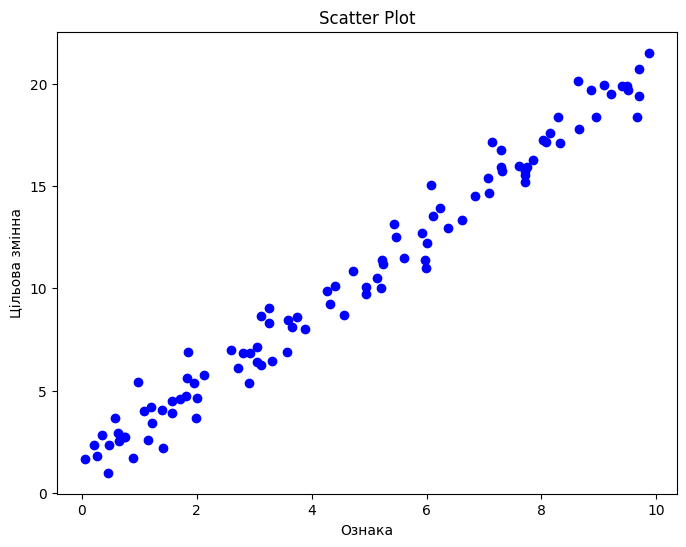

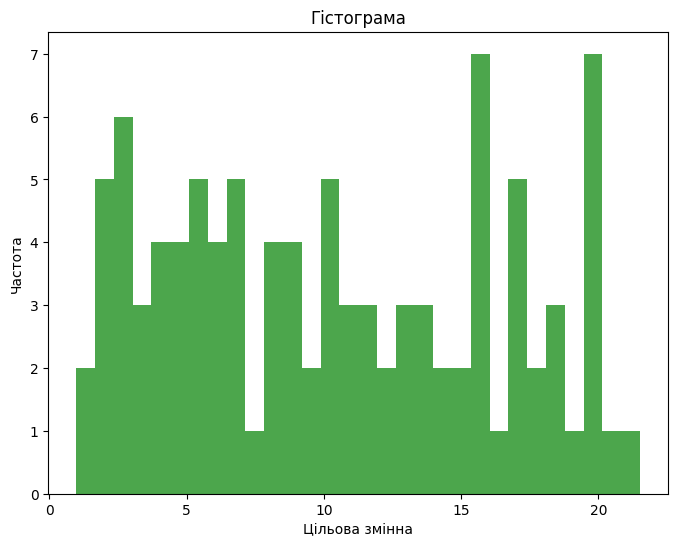

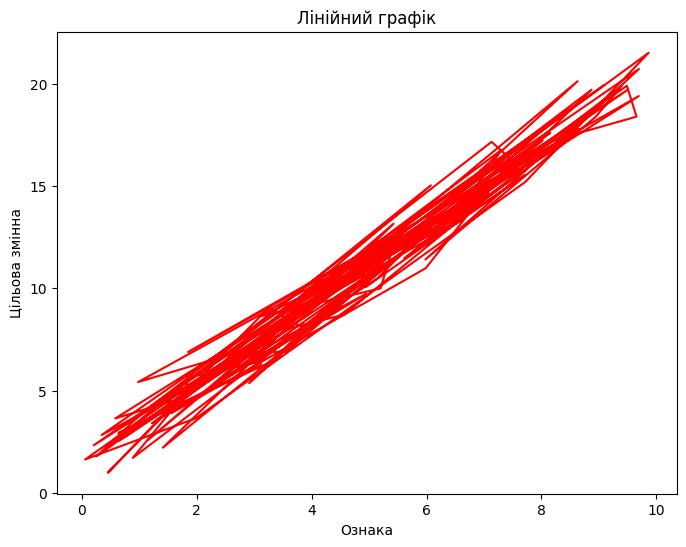

In [62]:
# 3_a
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_reg, y_reg, color='blue')
plt.title('Scatter Plot')
plt.xlabel('Ознака')
plt.ylabel('Цільова змінна')
plt.show()

# Гістограма
plt.figure(figsize=(8, 6))
plt.hist(y_reg, bins=30, color='green', alpha=0.7)
plt.title('Гістограма')
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.show()

# Лінійний графік
plt.figure(figsize=(8, 6))
plt.plot(X_reg, y_reg, color='red')
plt.title('Лінійний графік')
plt.xlabel('Ознака')
plt.ylabel('Цільова змінна')
plt.show()

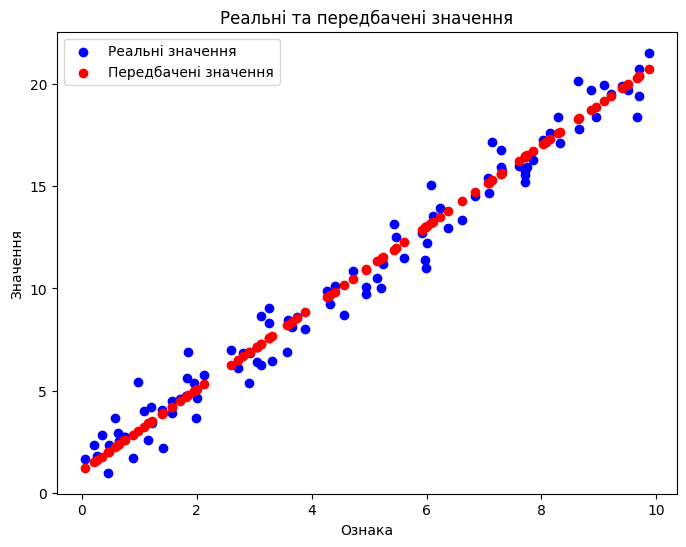

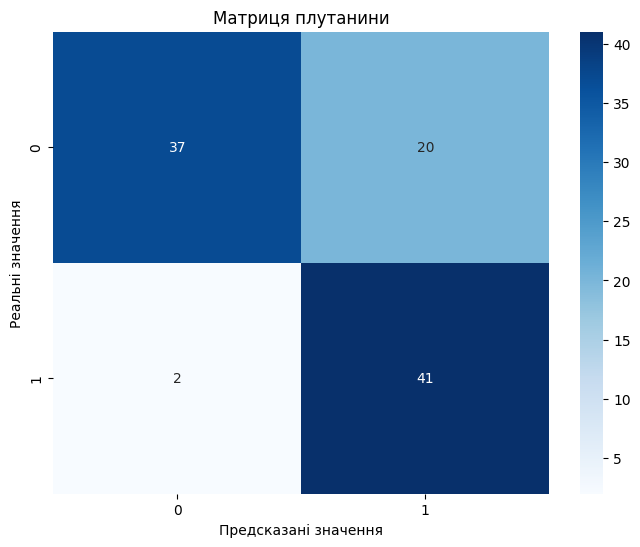

In [59]:
# 3_b
# Візуалізація реальних та передбачених значень
plt.figure(figsize=(8, 6))
plt.scatter(X_reg, y_reg, color='blue', label='Реальні значення')
plt.scatter(X_reg, y_pred_reg, color='red', label='Передбачені значення')
plt.title('Реальні та передбачені значення')
plt.xlabel('Ознака')
plt.ylabel('Значення')
plt.legend()
plt.show()

# Візуалізація матриці плутанини
cm = confusion_matrix(y_cls, y_pred_cls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця плутанини')
plt.xlabel('Предсказані значення')
plt.ylabel('Реальні значення')
plt.show()
